In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.optimize import minimize

In [2]:
data = loadmat('ex5data1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])

In [3]:
# 训练集
X_train, y_train = data['X'], data['y']
X_train.shape, y_train.shape

((12, 1), (12, 1))

In [4]:
# 验证集
X_val, y_val = data['Xval'], data['yval']
X_val.shape, y_val.shape

((21, 1), (21, 1))

In [5]:
# 测试集
X_test, y_test = data['Xtest'], data['ytest']
X_test.shape, y_test.shape

((21, 1), (21, 1))

In [6]:
X_train = np.insert(X_train, 0, 1, axis=1)
X_val = np.insert(X_val, 0, 1, axis=1)
X_test = np.insert(X_test, 0, 1, axis=1)
X_train, X_train.shape

(array([[  1.        , -15.93675813],
        [  1.        , -29.15297922],
        [  1.        ,  36.18954863],
        [  1.        ,  37.49218733],
        [  1.        , -48.05882945],
        [  1.        ,  -8.94145794],
        [  1.        ,  15.30779289],
        [  1.        , -34.70626581],
        [  1.        ,   1.38915437],
        [  1.        , -44.38375985],
        [  1.        ,   7.01350208],
        [  1.        ,  22.76274892]]),
 (12, 2))

In [7]:
def plot_data():
    fig, ax = plt.subplots()
    ax.scatter(X_train[:, 1], y_train)
    ax.set(xlabel = 'change in water level(x)', 
          ylabel = 'water flowing out of the dam(y)')

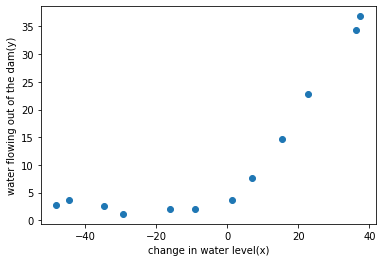

In [8]:
plot_data()

损失函数：
$$J(\theta) = \frac{1}{2m}\bigg[\sum^m_{i=1}(h_\theta(x^{(i)})-y^{(i)})^2 + \lambda\sum^m_{j=1}\theta^2_j\bigg]$$
损失函数向量化：
$$J(\theta) = \frac{1}{2m}SUM((X@\theta-y)^2)+\frac{\lambda}{2m}\theta^2$$
（$\theta$的第一个参数不参与正则化）

梯度：
$$\frac{\partial J(\theta)}{\partial\theta_j} = \bigg(\frac{1}{m}\sum^m_{i=1}(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)} \bigg)+\frac{\lambda}{m}\theta_j$$
梯度向量化：
$$reg=\frac{1}{m}(X@\theta-y)@X+\frac{\lambda}{m}\theta$$

In [10]:
# 定义带正则化的损失函数
def reg_cost(theta, X, y, _lambda):
    cost = np.sum(np.power((X@theta - y.flatten()), 2))
    reg = theta[1:]@theta[1:] * _lambda
    return (cost + reg) / (2 * len(X))

In [14]:
# 看一下损失函数写对了没有
theta = np.ones(X_train.shape[1])  # theta的个数是训练集的列数
_lambda = 1
reg_cost(theta, X_train, y_train, _lambda)

303.9931922202643

In [16]:
theta, theta.shape

(array([1., 1.]), (2,))

In [18]:
# 定义带正则化的梯度函数
def reg_gradient(theta, X, y, _lambda):
    grad = (X@theta - y.flatten())@X
    reg = _lambda * theta
    reg[0] = 0  # 偏移项不参加正则化
    return (grad + reg) / len(X)

In [19]:
reg_gradient(theta, X_train, y_train, _lambda)

array([-15.30301567, 598.25074417])

In [21]:
# 定义训练模型的函数
def train_model(X, y, _lambda):
    theta = np.ones(X.shape[1])
    
    res = minimize(fun = reg_cost, 
                  x0 = theta, 
                  args = (X, y, _lambda), 
                  method = 'TNC', 
                  jac = reg_gradient)
    
    return res.x

In [22]:
theta_final = train_model(X_train, y_train, _lambda=0) # 线性回归不会过拟合，先不设置 lambda

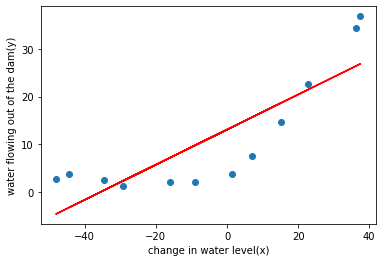

In [24]:
plot_data()
plt.plot(X_train[:, 1], X_train@theta_final, c='r')
plt.show()